In [2]:
from scipy.io import loadmat

# Load the .mat file
data = loadmat('C:/Users/Zahra/Downloads/widar3/train/train/train-ENV1CNT98-2.mat')

# Access the CSI data
csi_data = data['CSI']  # Shape: (T, 30, 3, 6)
print(f"Shape of CSI data: {csi_data.shape}")


Shape of CSI data: (440, 30, 3, 6)


In [3]:
# Assuming the last dimension stores [real, imaginary] components
real = csi_data[..., 0]  # Extract the real part (shape: T x 30 x 3)
imag = csi_data[..., 1]  # Extract the imaginary part (shape: T x 30 x 3)

print(f"Shape of real part: {real.shape}")
print(f"Shape of imaginary part: {imag.shape}")


Shape of real part: (440, 30, 3)
Shape of imaginary part: (440, 30, 3)


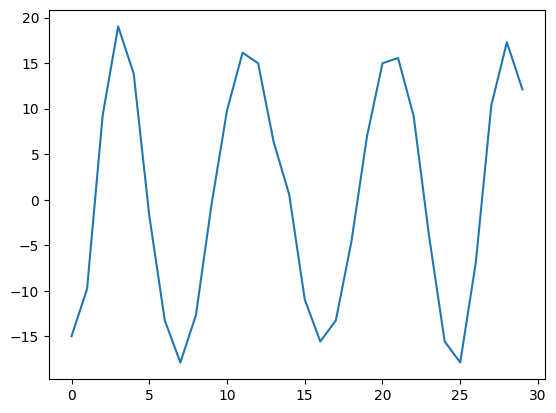

In [20]:
import matplotlib.pyplot as plt
plt.plot(csi_data[0, :, 0, 0])  # Plot the first time step for one receiver
plt.show()


In [21]:
print(csi_data.shape)  # Shape of the CSI data
print(csi_data.dtype)  # Data type of the CSI data


(440, 30, 3, 6)
complex64


In [22]:
# Extract real and imaginary parts
real = csi_data.real  # Shape: (T, 30, 3, 6)
imag = csi_data.imag  # Shape: (T, 30, 3, 6)

print(f"Shape of real part: {real.shape}")
print(f"Shape of imaginary part: {imag.shape}")


Shape of real part: (440, 30, 3, 6)
Shape of imaginary part: (440, 30, 3, 6)


In [24]:
# Compute amplitude
amplitude = np.sqrt(real**2 + imag**2)  # Shape: (T, 30, 3, 6)

# Compute phase
phase = np.arctan2(imag, real)  # Shape: (T, 30, 3, 6)

print(f"Shape of amplitude: {amplitude.shape}")
print(f"Shape of phase: {phase.shape}")


Shape of amplitude: (440, 30, 3, 6)
Shape of phase: (440, 30, 3, 6)


In [25]:
# Aggregate features over time (mean and std for each subcarrier and antenna)
mean_amplitude = np.mean(amplitude, axis=0)  # Shape: (30, 3, 6)
std_amplitude = np.std(amplitude, axis=0)    # Shape: (30, 3, 6)
mean_phase = np.mean(phase, axis=0)          # Shape: (30, 3, 6)
std_phase = np.std(phase, axis=0)            # Shape: (30, 3, 6)

# Flatten the features for training
features = np.concatenate((mean_amplitude.flatten(), std_amplitude.flatten(), 
                            mean_phase.flatten(), std_phase.flatten()))


In [26]:
# Example file name
file_name = "train-ENV1CNT98-2.mat"

# Extract gesture label
gesture_label = int(file_name.split('-')[-1].split('.')[0])  # Get the label
print(f"Gesture Label: {gesture_label}")


Gesture Label: 2


In [30]:
import os

# Initialize lists to store features and labels
X_all = []
y_all = []

# Path to training directory
train_dir = "C:/Users/Zahra/Downloads/widar3/train/train/"

# Loop through all .mat files
for file_name in os.listdir(train_dir):
    if file_name.endswith(".mat"):
        # Load the .mat file
        file_path = os.path.join(train_dir, file_name)
        data = loadmat(file_path)
        
        # Extract CSI data
        csi_data = data['CSI']  # Shape: (T, 30, 3, 6)
        
        # Extract features
        real = csi_data.real
        imag = csi_data.imag
        amplitude = np.sqrt(real**2 + imag**2)
        phase = np.arctan2(imag, real)
        
        # Aggregate features over time
        mean_amplitude = np.mean(amplitude, axis=0)
        std_amplitude = np.std(amplitude, axis=0)
        mean_phase = np.mean(phase, axis=0)
        std_phase = np.std(phase, axis=0)
        
        # Flatten features
        features = np.concatenate((mean_amplitude.flatten(), std_amplitude.flatten(), 
                                    mean_phase.flatten(), std_phase.flatten()))
        
        # Extract label from filename
        gesture_label = int(file_name.split('-')[-1].split('.')[0])  # Get label
        
        # Append features and label
        X_all.append(features)
        y_all.append(gesture_label)

# Convert to NumPy arrays
X_all = np.array(X_all)
y_all = np.array(y_all)

print(f"Feature Matrix Shape: {X_all.shape}, Labels Shape: {y_all.shape}")


Feature Matrix Shape: (4050, 2160), Labels Shape: (4050,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# # Initialize and train a Random Forest model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.2f}")
# print(classification_report(y_test, y_pred))

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\Zahra\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
349 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zahra\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zahra\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Zahra\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_all and y_all are prepared feature matrix and labels

# Step 1: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest model with the best parameters
best_params = {
    'n_estimators': 300,       # Number of trees
    'max_depth': None,         # No limit on the depth of the trees
    'min_samples_split': 2,    # Minimum samples required to split an internal node
    'min_samples_leaf': 1,     # Minimum samples required to be at a leaf node
    'max_features': 'sqrt',     # Number of features to consider when looking for the best split
    'bootstrap': False          # Whether bootstrap samples are used when building trees
}

# Create the Random Forest model
model = RandomForestClassifier(**best_params)

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

# Optional: Detailed classification report
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 0.85
              precision    recall  f1-score   support

           1       0.92      0.85      0.89       151
           2       0.84      0.81      0.82       124
           3       0.85      0.82      0.84       134
           4       0.80      0.86      0.83       135
           5       0.83      0.86      0.84       134
           6       0.86      0.89      0.87       132

    accuracy                           0.85       810
   macro avg       0.85      0.85      0.85       810
weighted avg       0.85      0.85      0.85       810



In [52]:
print((y_all))

[1 2 6 ... 6 1 2]
